In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_pickle("yearly_bovespa.pkl")
data.head()

,Code,Date,AvgPrc,MaxPrc
codes,,,,
AALL34,NaN,NaN,Date 2019-10-03 103.00 2019-10-09 109.40...,Date 2019-10-03 103.00 2019-10-09 109.40...
AALL34F,NaN,NaN,Date 2019-08-16 193.89 2019-12-17 115.85...,Date 2019-08-16 193.89 2019-12-17 115.85...
AALR3,NaN,NaN,Date 2019-01-02 13.33 2019-01-03 13.40 2...,Date 2019-01-02 13.50 2019-01-03 13.65 2...
AALR3F,NaN,NaN,Date 2019-01-02 13.32 2019-01-03 13.47 2...,Date 2019-01-02 13.61 2019-01-03 13.70 2...
AALR3T,NaN,NaN,Date 2019-01-14 13.40 2019-01-22 14.27 2...,Date 2019-01-14 13.41 2019-01-22 14.28 2...


In [3]:
data["AvgPrc"]["ABEV3"].head()

Date
2019-01-02    15.95
2019-01-03    16.08
2019-01-04    16.49
2019-01-07    16.50
2019-01-08    16.31
Name: AvgPrc, dtype: float64

In [4]:
data["AvgPrc"]["ABEV3"][0]

15.95

In [5]:
def plot_avg_prc(code, dataframe):
    plt.figure(1, (16, 6))

    plt.xlabel('Time')
    plt.title('Stocks Average Price')

    plt.text("2019-01", dataframe["AvgPrc"][code][0] + 3, code)
    plt.plot(dataframe["AvgPrc"][code], 'b', linewidth=1)

    plt.grid()

/usr/local/lib/python3.5/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


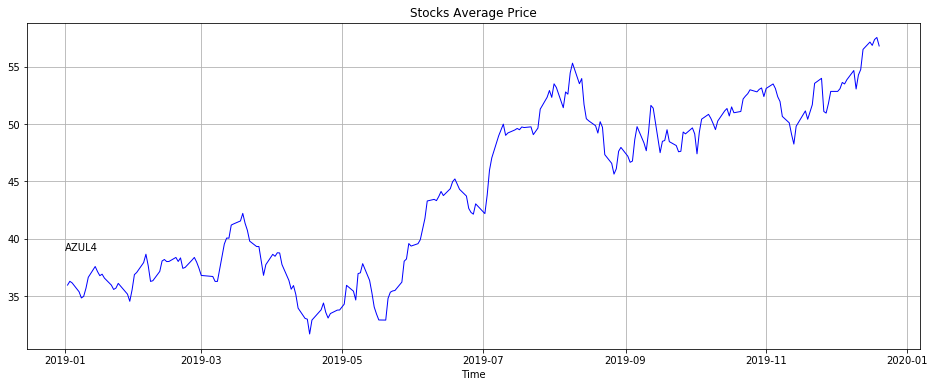

In [6]:
plot_avg_prc("AZUL4", data)

## Calculating change percentage between the averages of two days, and plotting the frequency distribution, we have

In [7]:
def calc_freq_series(code, dataframe, param):
    if not code in dataframe[param]:
        print("Error, code not present on dataset")
        return None
    percentage_series = pd.Series(index=data[param][code].index)
    for i in range(1, data[param][code].size):
        percentage_series[i-1] = (data[param][code][i] - data[param][code][i-1])/data[param][code][i-1]
    return percentage_series
        
        
        

Standard deviation of percentage changes: 1.08899536724475%
Mean of percentage changes: 0.10996041220913319%


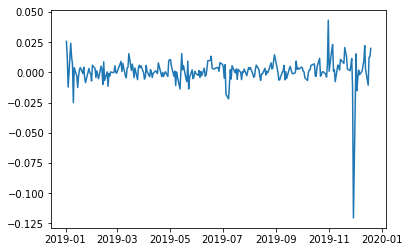

In [8]:
p_s = calc_freq_series("MGFF11", data, "AvgPrc")
plt.plot(p_s)
print("Standard deviation of percentage changes: " + str(100*p_s.std()) + "%")
print("Mean of percentage changes: " + str(100*p_s.mean()) + "%")

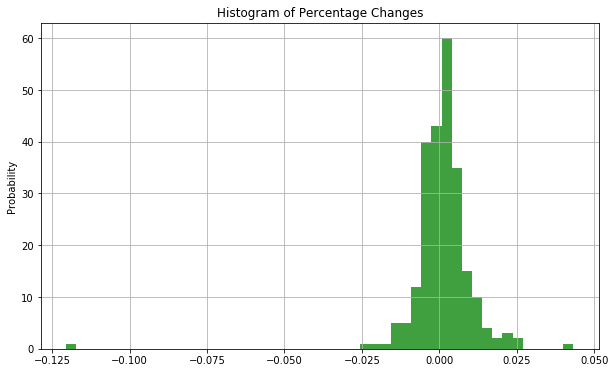

In [9]:
plt.figure(1, (10,6))
plt.hist(p_s.value_counts().index, 50, facecolor='g', alpha=0.75)
plt.ylabel('Probability')
plt.title('Histogram of Percentage Changes')
plt.grid(True)

AxesSubplot(0.125,0.125;0.775x0.755)


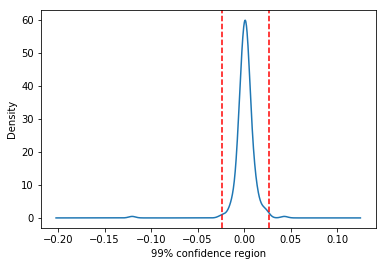

In [10]:
coeficients = p_s.plot.density()
print(coeficients)
plt.figure(1)
plt.xlabel("99% confidence region")
plt.axvline(p_s.mean() + 2.33*p_s.std(), color='r', linestyle='--')
plt.axvline(p_s.mean() - 2.33*p_s.std(), color='r', linestyle='--')

### Now let's make a function that calculates it all, plots and returns

* Mean value
* Standard Deviation (Volatility)

In [11]:
def calc_freq_distribution(code, dataframe, param):
    if not code in dataframe[param]:
        print("Error, code not present on dataset")
        return None
    percentage_distribution = pd.Series(index=data[param][code].index)
    for i in range(1, data[param][code].size):
        percentage_distribution[i-1] = (data[param][code][i] - data[param][code][i-1])/data[param][code][i]
    
    plt.figure(1, (10, 6))
    plt.hist(percentage_distribution.value_counts().index, 30, facecolor='g', alpha=0.75)
    plt.xlabel("99% confidence region")
    plt.axvline(percentage_distribution.mean() + 2.33*percentage_distribution.std(), color='r', linestyle='--')
    plt.axvline(percentage_distribution.mean() - 2.33*percentage_distribution.std(), color='r', linestyle='--')
    
    print("Mean: " + str(100*percentage_distribution.mean()) + "%")
    print("Standard Deviation: " + str(100*percentage_distribution.std()) + "%")
    
    print("Boundaries: [" + str(100*(percentage_distribution.mean() - 2.33*percentage_distribution.std())) + "%, " + str(100*(percentage_distribution.mean() + 2.33*percentage_distribution.std())) + "%]")
    
    plt.figure(2, (10, 6))
    percentage_distribution.plot.kde()
    plt.xlabel("99% confidence region")
    plt.axvline(percentage_distribution.mean() + 2.33*percentage_distribution.std(), color='r', linestyle='--')
    plt.axvline(percentage_distribution.mean() - 2.33*percentage_distribution.std(), color='r', linestyle='--')
    
    
    return percentage_distribution.mean(), percentage_distribution.std()

Mean: 0.09727125013776605%
Standard Deviation: 1.1628709919907503%
Boundaries: [-2.612218161200682%, 2.806760661476214%]


(0.0009727125013776605, 0.011628709919907502)

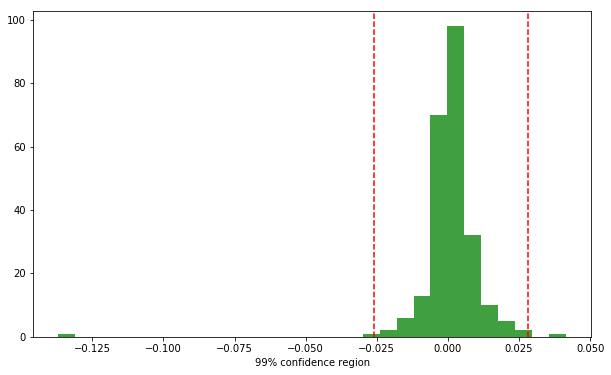

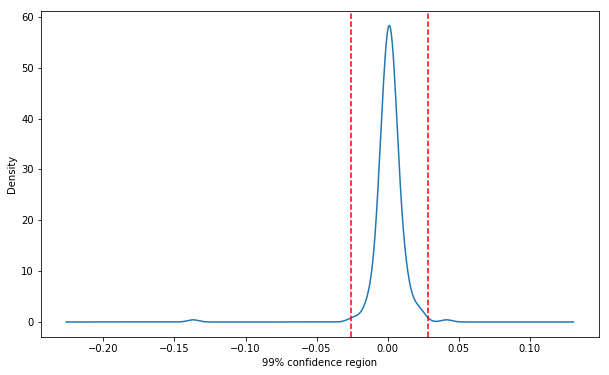

In [12]:
calc_freq_distribution("MGFF11", data, "AvgPrc")

## Portfolio Analysis
8 assets in 10/01/2019:
* AZUL4F
* BRCR11
* B3SA3F
* IDNT3F
* ITSA4F
* IVVB11
* MGFF11
* QUAL3F

In [13]:
assets = ["AZUL4F", "BRCR11", "B3SA3F", "IDNT3F", "ITSA4F", "IVVB11", "MGFF11", "QUAL3F"]
#In the order above, the position vector is
X = np.single([57.72, 121.50, 45.59, 6.64, 26.90, 142.8, 118.4, 39.87])#, dtype=np.float)
Xo = np.single([57.72, 121.50, 45.59, 6.64, 26.90, 142.8, 118.4, 39.87])#, dtype=np.float)
# The inicial positions were
i=0
for asset in assets:
    Xo[i] = data["AvgPrc"][asset]["2019-12-17"]
    i += 1
    
Xo

array([ 56.9 , 103.11,  47.21,   2.64,  13.71, 139.13, 112.58,  34.1 ],
      dtype=float32)

In [14]:
df = data["AvgPrc"][assets]
df

codes
AZUL4F    Date
2019-01-02    36.08
2019-01-03    36.41
2...
BRCR11    Date
2019-01-02    103.84
2019-01-03    104.87...
B3SA3F    Date
2019-01-02    27.46
2019-01-03    28.40
2...
IDNT3F    Date
2019-01-02    5.80
2019-01-03    5.86
201...
ITSA4F    Date
2019-01-02    12.46
2019-01-03    12.60
2...
IVVB11    Date
2019-01-02    101.03
2019-01-03     99.08...
MGFF11    Date
2019-01-02     91.51
2019-01-03     93.86...
QUAL3F    Date
2019-01-02    13.11
2019-01-03    13.75
2...
Name: AvgPrc, dtype: object

In [15]:
sigma = pd.DataFrame(index = assets, columns = assets)
for asset in assets:
    for asset2 in assets:
        sigma[asset][asset2] = df[asset].corr(df[asset2])
sigma

,AZUL4F,BRCR11,B3SA3F,IDNT3F,ITSA4F,IVVB11,MGFF11,QUAL3F
AZUL4F,1,-0.124629,0.936822,-0.371401,0.620567,0.735135,0.68882,0.885968
BRCR11,-0.124629,1,-0.308678,0.548554,0.384891,-0.435395,-0.164254,-0.288893
B3SA3F,0.936822,-0.308678,1,-0.534172,0.544428,0.876649,0.790279,0.962641
IDNT3F,-0.371401,0.548554,-0.534172,1,0.0152514,-0.708421,-0.498426,-0.524304
ITSA4F,0.620567,0.384891,0.544428,0.0152514,1,0.284136,0.511681,0.526098
IVVB11,0.735135,-0.435395,0.876649,-0.708421,0.284136,1,0.847445,0.904213
MGFF11,0.68882,-0.164254,0.790279,-0.498426,0.511681,0.847445,1,0.852429
QUAL3F,0.885968,-0.288893,0.962641,-0.524304,0.526098,0.904213,0.852429,1


In [16]:
(X.dot(sigma.to_numpy())).dot(X.transpose())

140353.68047825946

### That's the variance of our entire portfolio
Let's make a function for that as well

In [17]:
def calc_portfolio_variance(assets, X, df):
    sigma = pd.DataFrame(index = assets, columns = assets)
    for asset in assets:
        for asset2 in assets:
            sigma[asset][asset2] = df[asset].cov(df[asset2])

    s2 = (X.dot(sigma.to_numpy())).dot(X.transpose())
    s = np.sqrt(s2) #std deviation (volatility)

    return s2

In [18]:
calc_portfolio_variance(assets, X, df)

9078677.991207875

In [19]:
def calc_return(assets, weights, init_time, final_time, dataset):
    inicial_amount = 0
    for weight in weights:
        inicial_amount += weight
        
    Xo = np.arange(len(assets), dtype=np.float32)
    Xf = np.arange(len(assets), dtype=np.float32)
    
    i=0
    for asset in assets:
        Xo[i] = dataset["AvgPrc"][asset][init_time]
        Xf[i] = dataset["AvgPrc"][asset][final_time]
        i += 1
        
    asset_yields = np.arange(len(assets), dtype=np.float32)
    
    for i in range(len(assets)):
        asset_yields[i] = (Xf[i] - Xo[i])/Xo[i]
    
    final_amount = inicial_amount
    i=0
    for weight in weights:
        final_amount += weight * asset_yields[i]
        i += 1
    
    return (final_amount - inicial_amount)/inicial_amount
        

In [75]:
calc_return(assets, X, "2019-01-02", "2019-12-17", data)

0.37408726571346235

In [122]:
def calc_return_timeseries(assets, weights, init_time, final_time, dataset):
    series = pd.Series()
    i=0
    for time in dataset["AvgPrc"]["AZUL4F"].index: # so pq eu gosto de AZUL4
        try:
            aux_series = pd.Series([calc_return(assets, X, "2019-01-2", time.strftime("%Y-%m-%d"), data)], index=[time])
            series = series.append(aux_series)

        except Exception as e:
            print(e)
        i += 1
    return series

In [125]:
return_timeseries = calc_return_timeseries(assets, X, "2019-01-2", "2019-12-17", data)
return_timeseries.head()

'2019-02-01'
'2019-03-15'
'2019-05-09'


2019-01-02    0.000000
2019-01-03    0.010538
2019-01-04    0.016348
2019-01-07    0.007526
2019-01-08    0.011423
dtype: float64

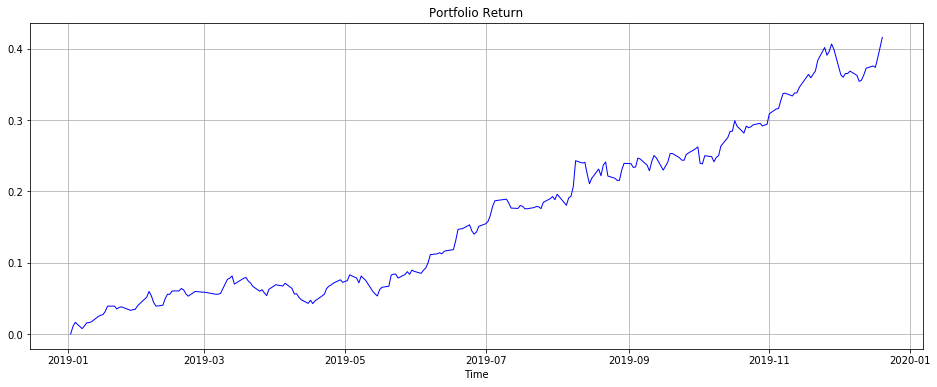

In [128]:
plt.figure(1, (16, 6))

plt.xlabel('Time')
plt.title('Portfolio Return')

plt.plot(return_timeseries, 'b', linewidth=1)

plt.grid()